In [59]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime, time

# Affichage des stars par date de naissance

In [161]:
year = 1960
dfStarsByBirthdate = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}')
dfStarsByBirthdate.set_index('name',inplace=True)
dfStarsByBirthdate

,birthdate,id
name,,
Alexia Robinson,1960-01-01,732356
Annabella Sciorra,1960-01-01,1711
Antonio Banderas,1960-01-01,104
April Winchell,1960-01-01,934589
Artur Cybulski,1960-01-01,194187
...,...,...
Tony Lima,1960-01-01,510720
Troy Martin,1960-01-01,1750963
Victor Warren,1960-01-01,1197546


# Affichage des films par bout de titre

In [159]:
movie_titlepart = 'From'
dfMovieByTitlepart = pd.read_json(f'http://localhost:8000/movies/by_titlepart/{movie_titlepart}')
dfMovieByTitlepart.set_index('title',inplace=True)
dfMovieByTitlepart

,year,duration,id
title,,,
The Man from Monterey,1933,57,24293
The Man from Utah,1934,55,25455
Lady from Louisiana,1941,82,33808
From Russia with Love,1963,115,57076
Force 10 from Navarone,1978,118,77572
Escape from Alcatraz,1979,112,79116
Rebel from China,1990,91,100992
From Dusk Till Dawn,1996,108,116367
From the Earth to the Moon,1998,60,120570


# Statistiques par acteur

In [164]:
dfStatsByActor =  pd.read_json(f'http://localhost:8000/stars/stats_movie_by_actor')
dfStatsByActor

,actor,movie_count,year_first_movie,year_last_movie
0,"{'name': 'John Wayne', 'birthdate': '1907-05-2...",172,1926,1976
1,"{'name': 'Harrison Ford', 'birthdate': '1884-0...",86,1915,2020
2,"{'name': 'Sean Connery', 'birthdate': '1930-08...",73,1954,2012
3,"{'name': 'Sylvester Stallone', 'birthdate': '1...",73,1969,2019
4,"{'name': 'Tom Hanks', 'birthdate': '1956-07-09...",69,1980,2020
...,...,...,...,...
161,"{'name': 'Patrick Wayne', 'birthdate': '1939-0...",10,1950,1971
162,"{'name': 'Frank Welker', 'birthdate': '1946-01...",10,1981,2019
163,"{'name': 'Grant Withers', 'birthdate': '1905-0...",10,1943,1955
164,"{'name': 'Michael Fassbender', 'birthdate': '1...",10,2001,2017


### transformation des data json en colonne

In [163]:
response = requests.get(f'http://localhost:8000/stars/stats_movie_by_actor')
if response.status_code == 200:
    print('Response OK')
    data_json = response.json()
else:
    print('Error', response.status_code, response.json(), sep=',')
response_flatten = [ { **data['actor'], "movie_count": data['movie_count'], "year_first_movie": data['year_first_movie'], "year_last_movie": data['year_last_movie']} for data in data_json]
dfStats = pd.DataFrame(response_flatten)
dfStats['birthdate'] = pd.to_datetime(dfStats['birthdate']).dt.strftime("%d/%m/%Y")
dfStats

Response OK


,name,birthdate,id,movie_count,year_first_movie,year_last_movie
0,John Wayne,26/05/1907,78,172,1926,1976
1,Harrison Ford,16/03/1884,1230,86,1915,2020
2,Sean Connery,25/08/1930,125,73,1954,2012
3,Sylvester Stallone,06/07/1946,230,73,1969,2019
4,Tom Hanks,09/07/1956,158,69,1980,2020
...,...,...,...,...,...,...
161,Patrick Wayne,01/01/1939,915618,10,1950,1971
162,Frank Welker,01/01/1946,919798,10,1981,2019
163,Grant Withers,01/01/1905,936728,10,1943,1955
164,Michael Fassbender,01/01/1977,1055413,10,2001,2017


## Graphe : nombre de films par année ( >20)

Response OK


<AxesSubplot:xlabel='year'>

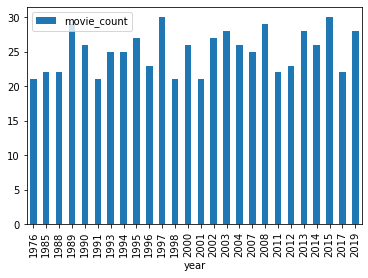

In [203]:
# nb de films par années 
response = requests.get('http://localhost:8000/movies/count_by_year_dic')
if response.status_code == 200:
    print('Response OK')
    data_json = response.json()
else:
    print('Error', response.status_code, response.json(), sep=',')
dfStatsMovie = pd.DataFrame(data_json)
dfStatsMovie[dfStatsMovie.movie_count > 20][['year','movie_count']] \
    .set_index('year') \
    .plot(kind='bar')

## Graphe : nombre de naissance d'acteur par années 

Response OK


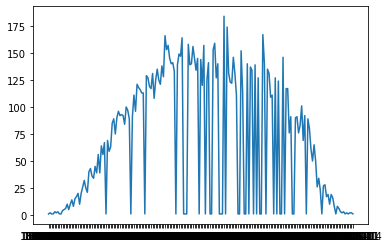

In [170]:
limit= 50000
response1 = requests.get(f'http://localhost:8000/stars?limit={limit}')
if response1.status_code == 200:
    print('Response OK')
    data_json = response1.json()
else:
    print('Error', response1.status_code, response1.json(), sep=',')
dfStatsStars = pd.DataFrame(data_json)
dfStatsStarsByBirthdate = dfStatsStars.dropna().groupby('birthdate').count()
plt.plot(dfStatsStarsByBirthdate.name)

## Diagrammes barres top 10 acteurs

In [175]:
response =  requests.get(f'http://localhost:8000/stars/stats_movie_by_actor')
response = requests.get(f'http://localhost:8000/stars/stats_movie_by_actor')
if response.status_code == 200:
    print('Response OK')
    data_json = response.json()
else:
    print('Error', response.status_code, response.json(), sep=',')
response_flatten = [ { **data['actor'], "movie_count": data['movie_count'], "year_first_movie": data['year_first_movie'], "year_last_movie": data['year_last_movie']} for data in data_json]
dfStatsActors = pd.DataFrame(response_flatten)
dfStatsActors['birthdate'] = pd.to_datetime(dfStatsActors['birthdate']).dt.strftime("%d/%m/%Y")
dfStatsActorsTop10 = dfStatsActors[:10] if dfStatsActors.size >= 10 else dfStatsActors
dfStatsActorsTop10

Response OK


,name,birthdate,id,movie_count,year_first_movie,year_last_movie
0,John Wayne,26/05/1907,78,172,1926,1976
1,Harrison Ford,16/03/1884,1230,86,1915,2020
2,Sean Connery,25/08/1930,125,73,1954,2012
3,Sylvester Stallone,06/07/1946,230,73,1969,2019
4,Tom Hanks,09/07/1956,158,69,1980,2020
5,Jean-Claude Van Damme,18/10/1960,241,66,1979,2019
6,Clint Eastwood,31/05/1930,142,63,1955,2018
7,Harrison Ford,13/07/1942,148,63,1966,2020
8,Arnold Schwarzenegger,30/07/1947,216,56,1970,2019
9,Will Smith,25/09/1968,226,50,1988,2020


### Nombre de films par acteurs

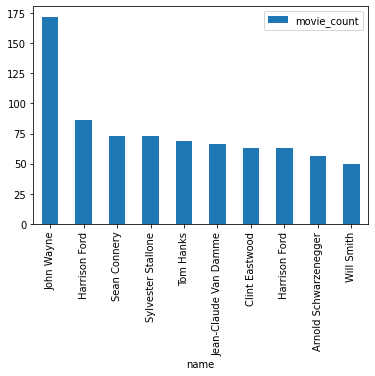

In [200]:
dfStatsActorsTop10MovieCount = dfStatsActorsTop10[['name', 'movie_count']].set_index('name').plot(kind='bar')

### Années premier et dernier film par acteur

(1900.0, 2030.0)

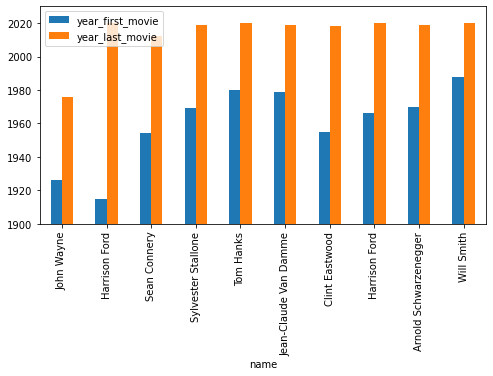

In [201]:
fig, ax1 = plt.subplots(1, figsize=(8,4))
dfStatsActorsTop10Years = dfStatsActorsTop10[['name', 'year_first_movie', 'year_last_movie']].set_index('name').plot(kind='bar', ax=ax1)
ax1.set_ylim(1900,2030)